# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Notebook Presentation

In [41]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [42]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [43]:
df_apps.shape

(10841, 12)

In [44]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

In [45]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
3337,Florida Keys,TRAVEL_AND_LOCAL,4.20,92,20.00,"10,000",Free,0,Everyone,Travel & Local,"April 6, 2017",4.0.3 and up
4485,Fon WiFi App – WiFi Connect,TOOLS,4.10,222,16.00,"50,000",Free,0,Everyone,Tools,"July 26, 2018",4.4 and up
2668,BP Tracker,HEALTH_AND_FITNESS,4.30,12,0.60,"1,000",Free,0,Everyone,Health & Fitness,"February 20, 2016",5.0 and up
5074,Alphabet A-Z,FAMILY,3.90,306,19.00,"100,000",Free,0,Everyone,Casual,"April 17, 2014",Varies with device
1158,EO Forum,BUSINESS,nan,0,1.10,100,Free,0,Everyone,Business,"April 5, 2013",2.1 and up


In [46]:
df_apps.Type.value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [47]:
df_apps.drop(['Last_Updated', 'Android_Ver'], axis=1, inplace=True)

### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [48]:
df_apps.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size_MBs             0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
dtype: int64

In [49]:
nan_rows = df_apps[df_apps.Rating.isna()]
print(nan_rows.shape)
nan_rows.head()

(1474, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,nan,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,nan,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,nan,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,nan,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,nan,0,10.00,0,Free,0,Everyone,Business


In [50]:
df_apps[df_apps.Rating.isna()]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,nan,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,nan,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,nan,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,nan,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,nan,0,10.00,0,Free,0,Everyone,Business
...,...,...,...,...,...,...,...,...,...,...
5840,Em Fuga Brasil,FAMILY,nan,1317,60.00,"100,000",Free,0,Everyone,Simulation
5862,Voice Tables - no internet,PARENTING,nan,970,71.00,"100,000",Free,0,Everyone,Parenting
6141,Young Speeches,LIBRARIES_AND_DEMO,nan,2221,2.40,"500,000",Free,0,Everyone,Libraries & Demo
7035,SD card backup,TOOLS,nan,142,3.40,"1,000,000",Free,0,Everyone,Tools


In [51]:
df_apps_clean = df_apps.dropna()
df_apps_clean.shape

(9367, 10)

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [52]:
duplicated_rows = df_apps_clean[df_apps_clean.duplicated()]
print(duplicated_rows.shape)
duplicated_rows.head()

(476, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.70,6,4.90,100,Free,0,Mature 17+,Dating


In [53]:
df_apps_clean[df_apps_clean.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [54]:
print(df_apps_clean.shape)
df_apps_clean = df_apps_clean.drop_duplicates(subset=['App', 'Type', 'Price'])
print(df_apps_clean.shape)

(9367, 10)
(8199, 10)


In [55]:
df_apps_clean[df_apps_clean.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [56]:
df_apps_clean.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical


In [84]:
df_apps_clean.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size_MBs          float64
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
dtype: object

In [87]:
df_apps_clean.Rating.value_counts().sort_index(ascending=False)

5.00    271
4.90     86
4.80    221
4.70    441
4.60    682
4.50    846
4.40    897
4.30    898
4.20    811
4.10    622
4.00    512
3.90    359
3.80    287
3.70    224
3.60    167
3.50    156
3.40    126
3.30    100
3.20     63
3.10     69
3.00     81
2.90     45
2.80     40
2.70     23
2.60     24
2.50     20
2.40     19
2.30     20
2.20     14
2.10      8
2.00     12
1.90     12
1.80      8
1.70      8
1.60      4
1.50      3
1.40      3
1.20      1
1.00     16
Name: Rating, dtype: int64

In [69]:
df_apps_clean.Rating.dtypes

dtype('float64')

In [72]:
df_apps_clean.sort_values(by='Rating', ascending=False)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography
...,...,...,...,...,...,...,...,...,...,...
1314,CR Magazine,BUSINESS,1.00,1,7.80,100,Free,0,Everyone,Business
1932,FE Mechanical Engineering Prep,FAMILY,1.00,2,21.00,"1,000",Free,0,Everyone,Education
357,Speech Therapy: F,FAMILY,1.00,1,16.00,10,Paid,$2.99,Everyone,Education
818,Familial Hypercholesterolaemia Handbook,MEDICAL,1.00,2,33.00,100,Free,0,Everyone,Medical


In [74]:
five_star = df_apps_clean[df_apps_clean.Rating == 5.00]

In [75]:
five_star.Category.value_counts()

FAMILY                 67
LIFESTYLE              29
MEDICAL                25
BUSINESS               18
TOOLS                  17
GAME                   12
HEALTH_AND_FITNESS     12
PERSONALIZATION        10
FINANCE                 8
PRODUCTIVITY            8
SOCIAL                  8
NEWS_AND_MAGAZINES      7
SHOPPING                6
EVENTS                  6
DATING                  6
BOOKS_AND_REFERENCE     6
PHOTOGRAPHY             6
COMMUNICATION           5
SPORTS                  4
TRAVEL_AND_LOCAL        3
COMICS                  2
FOOD_AND_DRINK          2
LIBRARIES_AND_DEMO      2
PARENTING               1
ART_AND_DESIGN          1
Name: Category, dtype: int64

In [99]:
five_star.Price.value_counts(normalize=True)

0        0.90
$0.99    0.04
$1.49    0.01
$4.99    0.01
$1.99    0.01
$2.99    0.01
$3.99    0.00
$29.99   0.00
$1.75    0.00
$19.99   0.00
$3.04    0.00
Name: Price, dtype: float64

In [78]:
five_star.Genres.value_counts()

Education              42
Lifestyle              29
Medical                25
Entertainment          19
Business               18
Tools                  17
Health & Fitness       12
Personalization        10
Finance                 8
Social                  8
Productivity            8
Arcade                  8
News & Magazines        7
Shopping                6
Books & Reference       6
Photography             6
Dating                  6
Events                  6
Communication           5
Sports                  4
Travel & Local          3
Puzzle                  3
Libraries & Demo        2
Food & Drink            2
Racing                  2
Comics                  2
Action                  1
Education;Education     1
Simulation              1
Casual                  1
Trivia                  1
Parenting               1
Art & Design            1
Name: Genres, dtype: int64

In [80]:
five_star[five_star.Price == '$19.99']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
526,USMLE Step 2 CK Flashcards,FAMILY,5.00,1,40.00,10,Paid,$19.99,Everyone,Education


In [90]:
five_star.Reviews.value_counts().sort_index(ascending=False)

141     1
104     1
103     1
100     1
90      1
47      1
44      1
43      3
41      1
36      2
34      1
33      1
32      1
30      1
26      1
25      1
24      1
23      1
22      4
21      1
20      2
19      3
18      2
17      1
16      1
15      4
14      3
13      3
12      4
11      1
10      6
9       3
8      11
7      13
6      12
5      25
4      27
3      37
2      42
1      45
Name: Reviews, dtype: int64

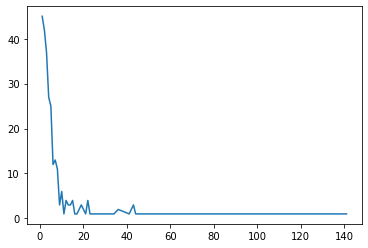

In [98]:
plt.plot(five_star.Reviews.value_counts().sort_index())

plt.show();

# 5 star apps probably have less than 10 reviews
# 90% of 5 star apps are free

# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [100]:
df_apps_clean.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical


In [101]:
df_apps_clean.sort_values('Size_MBs', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


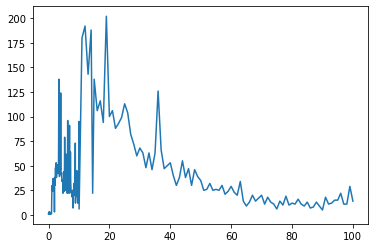

In [107]:
plt.plot(df_apps_clean.Size_MBs.value_counts().sort_index())

plt.show();

# 100 MB is probably the size limit for the Google store

# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [110]:
df_apps_clean.sort_values("Reviews", ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [111]:
ratings = df_apps_clean.Content_Rating.value_counts()
ratings

Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

In [122]:
fig = px.pie(labels=ratings.index, 
             values=ratings.values,
             title="Content Rating",
            names=ratings.index,
            hole=0.6)
fig.update_traces(textposition="outside", textinfo='percent+label')

fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [124]:
df_apps_clean.Installs.dtypes

dtype('O')

In [125]:
df_apps_clean.Installs.value_counts()

1,000,000        1417
100,000          1096
10,000            988
10,000,000        933
1,000             698
5,000,000         607
500,000           504
50,000            457
5,000             425
100               303
50,000,000        202
500               199
100,000,000       189
10                 69
50                 56
500,000,000        24
1,000,000,000      20
5                   9
1                   3
Name: Installs, dtype: int64

In [126]:
df_apps_clean.Installs

21                   1
28                   1
47                   1
82                   5
99                   5
             ...      
10824    1,000,000,000
10828    1,000,000,000
10829    1,000,000,000
10831    1,000,000,000
10835    1,000,000,000
Name: Installs, Length: 8199, dtype: object

In [138]:
# pd.to_numeric(df_apps_clean.Installs)
df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(',', '')
df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)


In [153]:
df_apps_clean.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size_MBs          float64
Installs            int64
Type               object
Price              object
Content_Rating     object
Genres             object
dtype: object

In [158]:
df_apps_clean[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [186]:
df_apps_clean.Price.describe()

count   8,199.00
mean        1.04
std        16.85
min         0.00
25%         0.00
50%         0.00
75%         0.00
max       400.00
Name: Price, dtype: float64

In [168]:
df_apps_clean.Price = df_apps_clean.Price.astype(str).str.replace("$", "")


21       0
28    1.49
47    0.99
82       0
99       0
Name: Price, dtype: object

In [169]:
df_apps_clean.Price = pd.to_numeric(df_apps_clean['Price'])
df_apps_clean.Price.head()

21   0.00
28   1.49
47   0.99
82   0.00
99   0.00
Name: Price, dtype: float64

In [173]:
df_apps_clean.sort_values('Price', ascending=False).head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle
5765,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle
1946,I am rich (Most expensive app),FINANCE,4.10,129,2.70,1000,Paid,399.99,Teen,Finance
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,5000,Paid,399.99,Everyone,Entertainment
3221,I am Rich Plus,FAMILY,4.00,856,8.70,10000,Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.30,180,3.80,5000,Paid,399.99,Everyone,Finance


### The most expensive apps sub $250

In [187]:
# Remove the illegitimate I Am Rich apps
df_apps_clean = df_apps_clean[df_apps_clean.Price < 250]
df_apps_clean.sort_values('Price', ascending=False).head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical,"79,990.00"
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical,"3,999.00"
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle,"37,990.00"
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical,"33,990.00"
2463,PTA Content Master,MEDICAL,4.20,64,41.00,1000,Paid,29.99,Everyone,Medical,"29,990.00"
2207,EMT PASS,MEDICAL,3.40,51,2.40,1000,Paid,29.99,Everyone,Medical,"29,990.00"
4264,Golfshot Plus: Golf GPS,SPORTS,4.10,3387,25.00,50000,Paid,29.99,Everyone,Sports,"1,499,500.00"
504,AP Art History Flashcards,FAMILY,5.00,1,96.00,10,Paid,29.99,Mature 17+,Education,299.90
4772,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.50,2921,25.00,100000,Paid,24.99,Everyone,Medical,"2,499,000.00"
3241,"Muscle Premium - Human Anatomy, Kinesiology, B...",MEDICAL,4.20,168,25.00,10000,Paid,24.99,Everyone,Medical,"249,900.00"


### Highest Grossing Paid Apps (ballpark estimate)

In [179]:
df_apps_clean['Revenue_Estimate'] = df_apps_clean.Price * df_apps_clean.Installs


In [182]:
df_apps_clean.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0.00,Everyone,Medical,0.00
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,1.49,Everyone,Arcade,1.49
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,0.99,Everyone,Arcade,0.99
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0.00,Everyone,Arcade,0.00
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0.00,Everyone,Medical,0.00


In [184]:
df_apps_clean.sort_values('Revenue_Estimate', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
5765,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle,"39,999,000.00"
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance,"19,999,500.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [193]:
df_apps_clean.Category.nunique()

33

In [201]:
top10_category = df_apps_clean.Category.value_counts()[:10]
top10_category
# df_apps_clean[['Category', 'App']].groupby('Category').count().sort_values('App', ascending=False)

FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: Category, dtype: int64

### Vertical Bar Chart - Highest Competition (Number of Apps)

In [207]:
bar = px.bar(x = top10_category.index,
            y = top10_category.values)

bar.show()

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [214]:
category_installs = df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)

In [215]:
category_installs

,Installs
Category,
EVENTS,15949410
BEAUTY,26916200
PARENTING,31116110
MEDICAL,39162676
COMICS,44931100
LIBRARIES_AND_DEMO,52083000
AUTO_AND_VEHICLES,53129800
HOUSE_AND_HOME,97082000
ART_AND_DESIGN,114233100


In [216]:
h_bar = px.bar(x = category_installs.Installs,
              y = category_installs.index,
              orientation='h',
              title='Category Popularity')

h_bar.update_layout(xaxis_title='Number of Downloads',
                   yaxis_title='Category')

h_bar.show();

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [237]:
cat_number = df_apps_clean.groupby('Category').agg({'App': pd.Series.count})
cat_merged_df = pd.merge(cat_number, category_installs, on='Category', how='inner')
cat_merged_df.sort_values('Installs', ascending=False)
cat_merged_df

,App,Installs
Category,,
ART_AND_DESIGN,61,114233100
AUTO_AND_VEHICLES,73,53129800
BEAUTY,42,26916200
BOOKS_AND_REFERENCE,169,1665791655
BUSINESS,262,692018120
COMICS,54,44931100
COMMUNICATION,257,11039241530
DATING,134,140912410
EDUCATION,118,352852000


In [231]:
category_concentration = df_apps_clean.groupby('Category').agg({'App': pd.Series.count, 'Installs': pd.Series.sum})
category_concentration

,App,Installs
Category,,
ART_AND_DESIGN,61,114233100
AUTO_AND_VEHICLES,73,53129800
BEAUTY,42,26916200
BOOKS_AND_REFERENCE,169,1665791655
BUSINESS,262,692018120
COMICS,54,44931100
COMMUNICATION,257,11039241530
DATING,134,140912410
EDUCATION,118,352852000


In [238]:
scatter_plot = px.scatter(category_concentration,
                        x = 'App',
                        y = 'Installs',
                        title='Category Concentration',
                        size = 'App',
                        hover_name=category_concentration.index,
                        color = 'Installs',
                         )

scatter_plot.update_layout(xaxis_title='Number of Apps (Lower = More Concentrated)',
                           yaxis_title='Installs',
                            yaxis=dict(type='log'))

scatter_plot.show();

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [243]:
df_apps_clean.Genres.value_counts().count()

114

In [255]:
df_apps_clean.Genres.value_counts()

Tools                                  718
Entertainment                          467
Education                              429
Productivity                           301
Personalization                        298
                                      ... 
Health & Fitness;Education               1
Tools;Education                          1
Health & Fitness;Action & Adventure      1
Casual;Music & Video                     1
Lifestyle;Education                      1
Name: Genres, Length: 114, dtype: int64

In [259]:
df_apps_clean[df_apps_clean['Genres'] == 'Health & Fitness;Education']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
5698,Sworkit Kids - Fitness Meets Fun,FAMILY,4.70,9856,55.00,100000,Free,0.00,Everyone,Health & Fitness;Education,0.00


In [271]:
stack = df_apps_clean.Genres.str.split(";", expand=True).stack()
stack

21     0                    Medical
28     0                     Arcade
47     0                     Arcade
82     0                     Arcade
99     0                    Medical
                     ...           
10824  0               Productivity
10828  0    Video Players & Editors
10829  0    Video Players & Editors
10831  0           News & Magazines
10835  0                     Arcade
Length: 8564, dtype: object

In [282]:
stack[5698:5728]

7228  0              Racing
7229  0          Simulation
7230  0              Sports
7231  0     Auto & Vehicles
7232  0       Entertainment
      1       Music & Video
7233  0              Action
7234  0       Entertainment
      1       Music & Video
7235  0       Entertainment
7236  0        Role Playing
7237  0       Entertainment
      1       Music & Video
7238  0          Simulation
7239  0             Medical
7240  0         Photography
7241  0    News & Magazines
7243  0    Health & Fitness
7244  0              Arcade
7245  0              Arcade
7246  0           Adventure
7247  0              Arcade
7248  0              Racing
7249  0              Casual
      1        Pretend Play
7250  0          Simulation
7251  0        Productivity
7252  0            Business
7253  0              Comics
7254  0    Health & Fitness
dtype: object

In [283]:
stack[5698]

0    Health & Fitness
1           Education
dtype: object

In [251]:
stack.shape

(8564,)

In [257]:
stack.value_counts().count()

53

In [285]:
num_genres = stack.value_counts()

In [294]:
bar_genres = px.bar(
            x = num_genres.index[:15],
            y = num_genres.values[:15],
            title='Top Genres', 
            color = num_genres.values[:15],
            color_continuous_scale="Agsunset"
)

bar_genres.update_layout(
                xaxis_title='Genre',
                yaxis_title='Number of Apps',
                coloraxis_showscale=False
)

bar_genres.show();

**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

In [295]:
df_apps_clean.Type.value_counts()

Free    7595
Paid     589
Name: Type, dtype: int64

In [301]:
df_free_vs_paid = df_apps_clean.groupby(['Category', 'Type'], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


In [305]:
g_bar = px.bar(df_free_vs_paid,
              x='Category',
              y='App',
              title='Free vs Paid Apps by Category',
              color='Type',
              barmode='group')

g_bar.update_layout(
                xaxis_title='Category',
                yaxis_title='Number of Apps',
                xaxis={'categoryorder': 'total descending'},
                yaxis=dict(type='log')
)

g_bar.show();

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.